In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
from tensorflow.examples.tutorials.mnist import input_data

Need 4 things:
- prepared data
- inference
- loss measurement
- optimizer to minimize loss

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x = tf.placeholder(tf.float32, shape=[None, 784])
x_image = tf.reshape(x, [-1,28,28,1], name="x_image")
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [5]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28,28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

<module 'matplotlib.pyplot' from '/Users/richardhall/Dev/tf3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

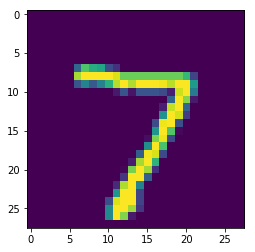

In [6]:
gen_image(mnist.test.images[0])

In [7]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

In [8]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [9]:
init = tf.global_variables_initializer()

In [10]:
sess = tf.Session()

In [11]:
sess.run(init)

In [12]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [13]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print("Test Accuracy: {0}%".format(test_accuracy * 100.0))

Test Accuracy: 90.71999788284302%


In [14]:
sess.close()

In [15]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])